# Sentiment Analysis of the reviews

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import nltk
import ssl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/khrystynamysak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(comment):
    score = analyzer.polarity_scores(comment)
    return (pd.DataFrame.from_dict(score, orient='index'))

reviews_path = './full_prepared_reviews.csv'
reviews = pd.read_csv(reviews_path)
# sentiment_analyzer_scores(reviews['comments'][0])

In [9]:
tqdm.pandas(desc="Calculating Polarity")

def polarity_compound(s):
    return (analyzer.polarity_scores(s))['compound']

reviews['polarity'] = reviews['comments'].progress_apply(polarity_compound)

Calculating Polarity: 100%|██████████| 887982/887982 [08:40<00:00, 1705.28it/s]


In [10]:
reviews[:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,id,date,reviewer_id,reviewer_name,comments,lang,polarity
0,2595,17857,2009-11-21,50679.000000,Jean,"Our three-night stay. We enjoyed the apartment which is very well located. Pleasant, clean and well maintained. It is ideal for a family of 3 or 4 people. Small problems when we arrived there was no one to welcome us, and the soap for the shower, the dishwashing liquid were missing, we received them the day after tomorrow. There is also the noise of the NY Metro, so a difficult first night if you are not used to it. Jennifer is correct the refund of the deposit was very fast. Apart from these small details our short stay went well. If I have the opportunity to return to NY for the holidays, I will stay at ""The Midtown Castle"" Jean Possession - Reunion Island",fr,0.953100
1,2595,19176,2009-12-05,53267.000000,Cate,Great experience.,ro,0.624900
2,2595,19760,2009-12-10,38960.000000,Anita,"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York. Attention: it's on the 4th floor without a lift :-) but definetely worth it!",en,0.924800
3,2595,34320,2010-04-09,71130.000000,Kai-Uwe,"We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!",en,0.922900
4,2595,46312,2010-05-25,117113.000000,Alicia,We had a wonderful stay at Jennifer's charming apartment! They were very organized and helpful; I would definitely recommend staying at the Midtown Castle!,en,0.946400


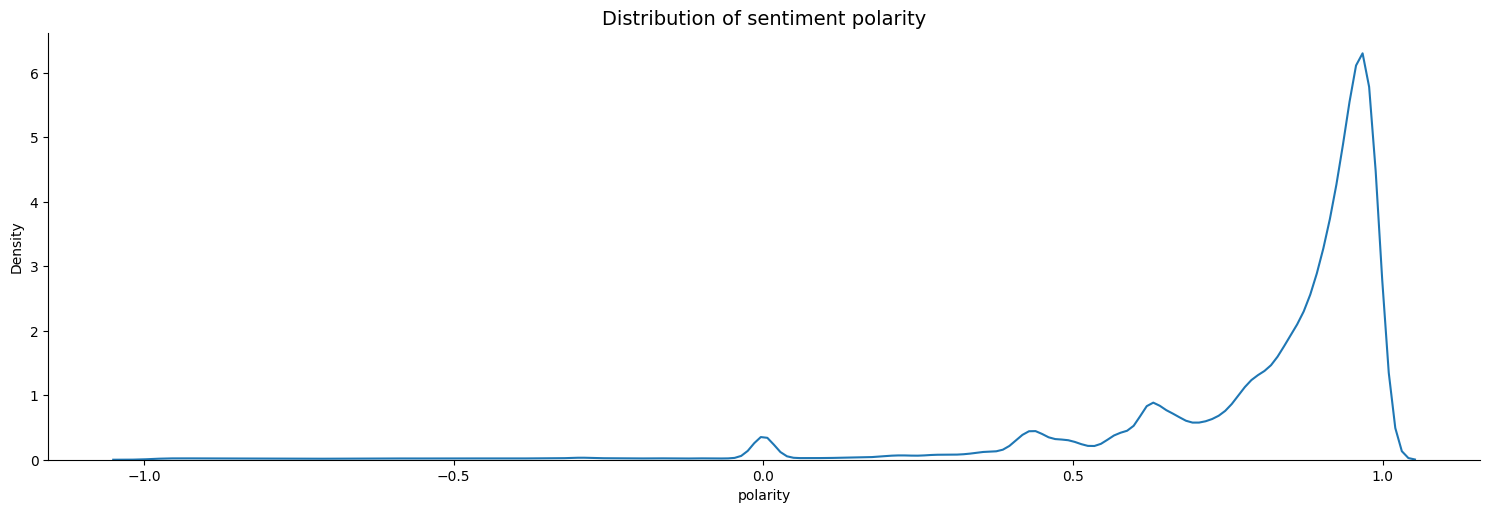

In [12]:
sns.displot(
    reviews['polarity'], 
    kind="kde", 
    height=5,
    aspect=3   # (width = height * aspect)
)

plt.title('Distribution of sentiment polarity', fontsize=14)
plt.show()

# Examine correlation between review polarity and review scores

In [14]:
listing = pd.read_csv("./NewYork/listings_cleaned.csv")
reviews = pd.read_csv("./NewYork/translated_reviews_polared.csv")

In [15]:
listing.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
   

In [16]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'lang', 'polarity'],
      dtype='object')

# Merge comments, polarity and listings into one DataFrame

In [17]:
df_reviews_grouped = (
    reviews.groupby('listing_id')
    .agg({'comments': list})
    .reset_index()
)
sel_reviews = reviews[['listing_id', 'reviewer_id', 'polarity']]
sel_reviews['polarity'] = pd.to_numeric(sel_reviews['polarity'])

df_polarities_grouped = (
    sel_reviews.groupby(['listing_id'])
    .agg({'polarity': list})
    .reset_index()
)
# list_pol = pd.DataFrame(sel_reviews.groupby(['listing_id']).mean()['polarity']) --- for mean polarity
df_reviews_combined = pd.merge(df_polarities_grouped, df_reviews_grouped, on='listing_id')

/var/folders/8b/hyq60bp52_9_w3t6s37pqbrr0000gn/T/ipykernel_52480/1745456211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_reviews['polarity'] = pd.to_numeric(sel_reviews['polarity'])


In [21]:
merged_df = pd.merge(listing, df_reviews_combined, left_on='id', right_on='listing_id', how='left')
merged_df = merged_df.drop(columns=['listing_id'])

In [22]:
merged_df.head()

,id,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,...,review_scores_rating,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,polarity,comments
0,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,missing,https://a0.muscache.com/pictures/5f44a178-6043...,Joshua,2020-07-23,"New York, United States",missing,...,4.83,missing,t,2,0,2,0,0.21,"[0.8713, 0.6588, 0.9809, 0.8519, 0.5106, 0.6588]",[Friendly host! Very comfortable and quiet pla...
1,13234457,https://www.airbnb.com/rooms/13234457,Cozy Clinton Hill Crib On Classon,"My place is close to Barclays Center, Alice's ...",missing,https://a0.muscache.com/pictures/011da841-7234...,Letha M.,2008-09-10,"New York, NY",missing,...,4.00,missing,f,1,1,0,0,0.02,"[0.9625, 0.8814]",[Letha was a great hostess! She was easy to co...
2,773237631431486588,https://www.airbnb.com/rooms/773237631431486588,Home sweet home,Relax with the whole family at this peaceful p...,missing,https://a0.muscache.com/pictures/miso/Hosting-...,Myaa,2022-04-17,missing,missing,...,5.00,missing,f,1,0,1,0,0.06,[0.8779],"[myaa is a considerate host, easy to work with..."
3,1097125455525075775,https://www.airbnb.com/rooms/1097125455525075775,MCM-inspired with aged brass and soothing neut...,Our beautifully arranged classic twin guest ro...,missing,https://a0.muscache.com/pictures/prohost-api/H...,The Tillary Hotel Brooklyn,2024-02-20,missing,missing,...,4.26,Exempt,t,7,0,7,0,3.65,"[0.8126, 0.5719, 0.6588, 0.0, 0.9594, 0.6249, ...","[Great comfortable stay., Excellent stay, Grea..."
4,760086536368275287,https://www.airbnb.com/rooms/760086536368275287,Luxury apt in the best location of E. Williams...,The apt is brand new! Features floor to ceilin...,missing,https://a0.muscache.com/pictures/fa2ee030-aa77...,Luciana,2011-06-23,"New York, NY",Hi!! Ben and Lulu here! we are in tech and fas...,...,5.00,missing,f,1,1,0,0,0.37,"[0.9507, 0.8213, 0.9793, 0.9097, 0.9759, 0.784...",[Beautiful space! Pictures don’t do it Justice...


In [23]:
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

id                                              0
listing_url                                     0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0
host_picture_url                                0
host_neighbourhood                              0
host_verifications                              0
neighbourhood_cleansed                          0
latitude                                        0


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21506 entries, 0 to 22730
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21506 non-null  int64  
 1   listing_url                                   21506 non-null  object 
 2   name                                          21506 non-null  object 
 3   description                                   21506 non-null  object 
 4   neighborhood_overview                         21506 non-null  object 
 5   picture_url                                   21506 non-null  object 
 6   host_name                                     21506 non-null  object 
 7   host_since                                    21506 non-null  object 
 8   host_location                                 21506 non-null  object 
 9   host_about                                    21506 non-null  obje

In [24]:
merged_df.to_csv('./NewYork/translated_merged_listings_reviews_polarities.csv', index=False)

In [25]:
merged_df.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
    

# Correlation between polarity and ratings

In [36]:
merged_result = pd.read_csv('./NewYork/full_merged_translated.csv')
reviews = pd.read_csv('./NewYork/translated_reviews_polared.csv')

In [37]:
sel_reviews = reviews[['listing_id', 'reviewer_id', 'polarity']]

In [38]:
sel_listings = merged_result[['id', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                         'review_scores_cleanliness', 'review_scores_checkin', 
                         'review_scores_communication', 'review_scores_location', 'review_scores_value',
                         'neighbourhood_cleansed']]

In [31]:
sel_reviews.dtypes

listing_id     float64
reviewer_id    float64
polarity       float64
dtype: object

In [39]:
sel_reviews['polarity'] = pd.to_numeric(sel_reviews['polarity'])
list_pol = pd.DataFrame(sel_reviews.groupby(['listing_id']).mean()['polarity'])

/var/folders/8b/hyq60bp52_9_w3t6s37pqbrr0000gn/T/ipykernel_52480/2155202062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_reviews['polarity'] = pd.to_numeric(sel_reviews['polarity'])


In [40]:
list_pol.head()

,polarity
listing_id,
2595,0.792058
5136,0.860300
6848,0.838259
6872,0.981700
6990,0.924763


In [41]:
# list_pol = pd.DataFrame(sel_reviews.groupby(['listing_id']).mean()['polarity'])
full = pd.merge(sel_listings, sel_reviews, left_on='id', right_on='listing_id', how='left')

In [42]:
full.head()

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_cleansed,listing_id,reviewer_id,polarity
0,572612125615500056,6,4.83,4.83,4.67,5.0,4.83,4.67,4.67,Sunset Park,572612125615500056,213713628.0,0.8713
1,572612125615500056,6,4.83,4.83,4.67,5.0,4.83,4.67,4.67,Sunset Park,572612125615500056,407939441.0,0.6588
2,572612125615500056,6,4.83,4.83,4.67,5.0,4.83,4.67,4.67,Sunset Park,572612125615500056,337056945.0,0.9809
3,572612125615500056,6,4.83,4.83,4.67,5.0,4.83,4.67,4.67,Sunset Park,572612125615500056,130825626.0,0.8519
4,572612125615500056,6,4.83,4.83,4.67,5.0,4.83,4.67,4.67,Sunset Park,572612125615500056,48550051.0,0.5106


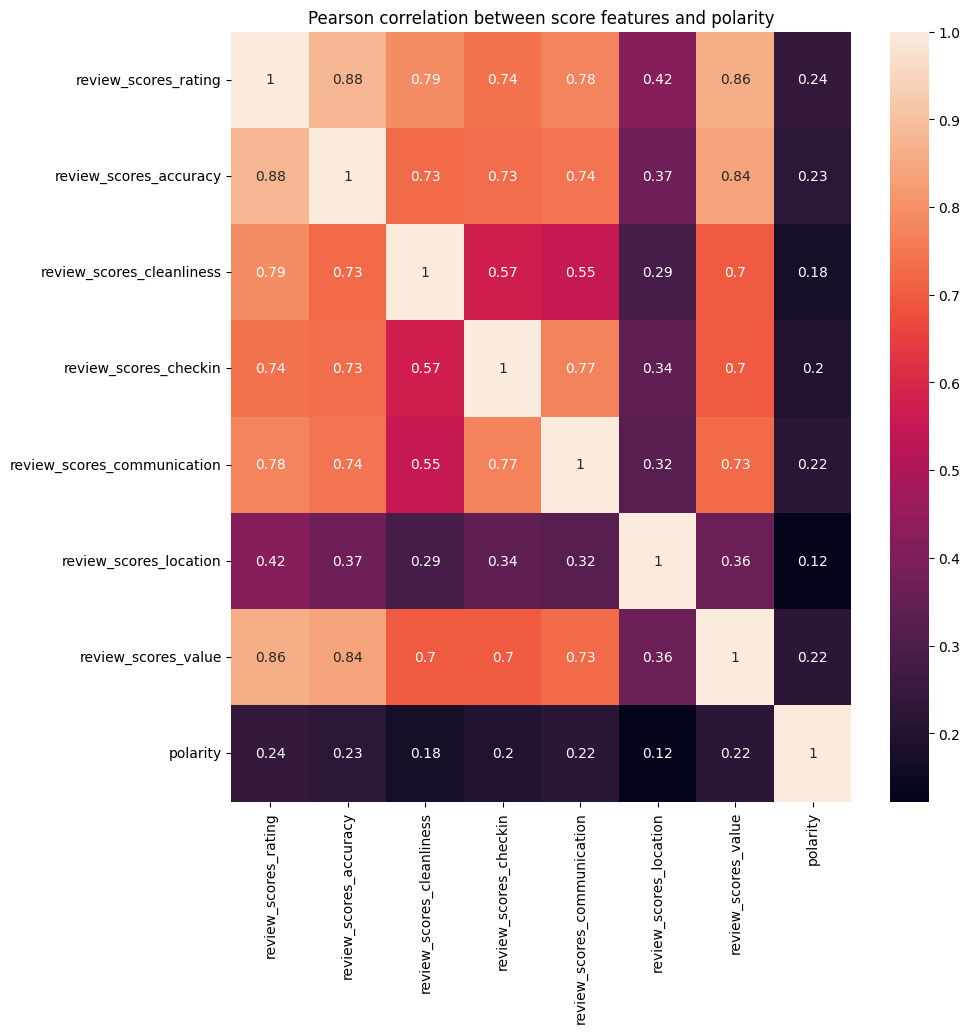

In [43]:
review_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                 'review_scores_value', 'polarity']

corr = full[review_scores].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.title('Pearson correlation between score features and polarity')
plt.show()

In [28]:
merged_img = pd.read_csv('./NewYork/merged_img_vectors.csv')
merged_polarities = pd.read_csv('./NewYork/translated_merged_listings_reviews_polarities.csv')

In [29]:
merged_img.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       

In [30]:
merged_result = merged_polarities.merge(merged_img[['id', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'photo_vector']], on='id', how='left')

In [31]:
merged_img.head()

,id,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,polarity,comments,photo_vector
0,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,missing,https://a0.muscache.com/pictures/5f44a178-6043...,Joshua,2020-07-23,"New York, United States",missing,...,missing,t,2,0,2,0,0.21,0.755383,['Friendly host! Very comfortable and quiet pl...,[0.99579644 0.05453015 0.00740186 0.01827555 0...
1,13234457,https://www.airbnb.com/rooms/13234457,Cozy Clinton Hill Crib On Classon,"My place is close to Barclays Center, Alice's ...",missing,https://a0.muscache.com/pictures/011da841-7234...,Letha M.,2008-09-10,"New York, NY",missing,...,missing,f,1,1,0,0,0.02,0.921950,"[""Letha was a great hostess! She was easy to c...",[0.9773287 0.05888927 0.05584503 0.09381795 0...
2,773237631431486588,https://www.airbnb.com/rooms/773237631431486588,Home sweet home,Relax with the whole family at this peaceful p...,missing,https://a0.muscache.com/pictures/miso/Hosting-...,Myaa,2022-04-17,missing,missing,...,missing,f,1,0,1,0,0.06,0.877900,"['myaa is a considerate host, easy to work wit...",[9.9997962e-01 5.6140092e-03 3.2629957e-04 6.4...
3,760086536368275287,https://www.airbnb.com/rooms/760086536368275287,Luxury apt in the best location of E. Williams...,The apt is brand new! Features floor to ceilin...,missing,https://a0.muscache.com/pictures/fa2ee030-aa77...,Luciana,2011-06-23,"New York, NY",Hi!! Ben and Lulu here! we are in tech and fas...,...,missing,f,1,1,0,0,0.37,0.918475,['Beautiful space! Pictures don’t do it Justic...,[0.9365714 0.01271252 0.00432584 0.03421113 0...
4,27883,https://www.airbnb.com/rooms/27883,East Village Sanctuary,"Sorry, this listing is no longer available.",missing,https://a0.muscache.com/pictures/2125269/6f827...,Jen,2010-05-07,"Maine, United States",Creative guru of media and fine art and good c...,...,missing,f,1,1,0,0,0.15,0.860724,"[""Jennifer was great to really work around our...",[4.4169790e-01 1.9763875e-01 3.6817792e-04 5.7...


In [32]:
merged_result.head()

,id,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_location,host_about,...,reviews_per_month,polarity,comments,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,photo_vector
0,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,missing,https://a0.muscache.com/pictures/5f44a178-6043...,Joshua,2020-07-23,"New York, United States",missing,...,0.21,"[0.8713, 0.6588, 0.9809, 0.8519, 0.5106, 0.6588]",['Friendly host! Very comfortable and quiet pl...,4.83,4.67,5.0,4.83,4.67,4.67,[0.99579644 0.05453015 0.00740186 0.01827555 0...
1,13234457,https://www.airbnb.com/rooms/13234457,Cozy Clinton Hill Crib On Classon,"My place is close to Barclays Center, Alice's ...",missing,https://a0.muscache.com/pictures/011da841-7234...,Letha M.,2008-09-10,"New York, NY",missing,...,0.02,"[0.9625, 0.8814]","[""Letha was a great hostess! She was easy to c...",5.00,3.00,5.0,2.00,5.00,5.00,[0.9773287 0.05888927 0.05584503 0.09381795 0...
2,773237631431486588,https://www.airbnb.com/rooms/773237631431486588,Home sweet home,Relax with the whole family at this peaceful p...,missing,https://a0.muscache.com/pictures/miso/Hosting-...,Myaa,2022-04-17,missing,missing,...,0.06,[0.8779],"['myaa is a considerate host, easy to work wit...",5.00,5.00,5.0,5.00,4.00,5.00,[9.9997962e-01 5.6140092e-03 3.2629957e-04 6.4...
3,1097125455525075775,https://www.airbnb.com/rooms/1097125455525075775,MCM-inspired with aged brass and soothing neut...,Our beautifully arranged classic twin guest ro...,missing,https://a0.muscache.com/pictures/prohost-api/H...,The Tillary Hotel Brooklyn,2024-02-20,missing,missing,...,3.65,"[0.8126, 0.5719, 0.6588, 0.0, 0.9594, 0.6249, ...","['Great comfortable stay.', 'Excellent stay', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,760086536368275287,https://www.airbnb.com/rooms/760086536368275287,Luxury apt in the best location of E. Williams...,The apt is brand new! Features floor to ceilin...,missing,https://a0.muscache.com/pictures/fa2ee030-aa77...,Luciana,2011-06-23,"New York, NY",Hi!! Ben and Lulu here! we are in tech and fas...,...,0.37,"[0.9507, 0.8213, 0.9793, 0.9097, 0.9759, 0.784...",['Beautiful space! Pictures don’t do it Justic...,5.00,5.00,5.0,5.00,5.00,5.00,[0.9365714 0.01271252 0.00432584 0.03421113 0...


In [33]:
merged_result.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
    

In [34]:
merged_result.to_csv('./NewYork/full_merged_translated.csv', index=False)